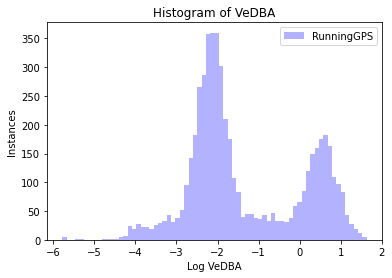

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_file = '/media/amlan/Data/Thesis Data/Processed Data/run_train_data.csv'
df = pd.read_csv(data_file, index_col=0)
df = df.reset_index(drop=True)

#df = df[df.Behavior == 'No observation']
df = df[df.VeDBA > 1e-6]
df.VeDBA  = np.log(df.VeDBA)
df = df.rename(columns={'VeDBA': 'Log VeDBA'})


df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df = df.reset_index(drop=True)
df.Behavior.value_counts()

plt.hist(df['Log VeDBA'],bins=70,color='b',label='RunningGPS',alpha=0.3)
plt.title('Histogram of VeDBA')
plt.xlabel('Log VeDBA')
plt.ylabel('Instances')
plt.legend()
plt.show()

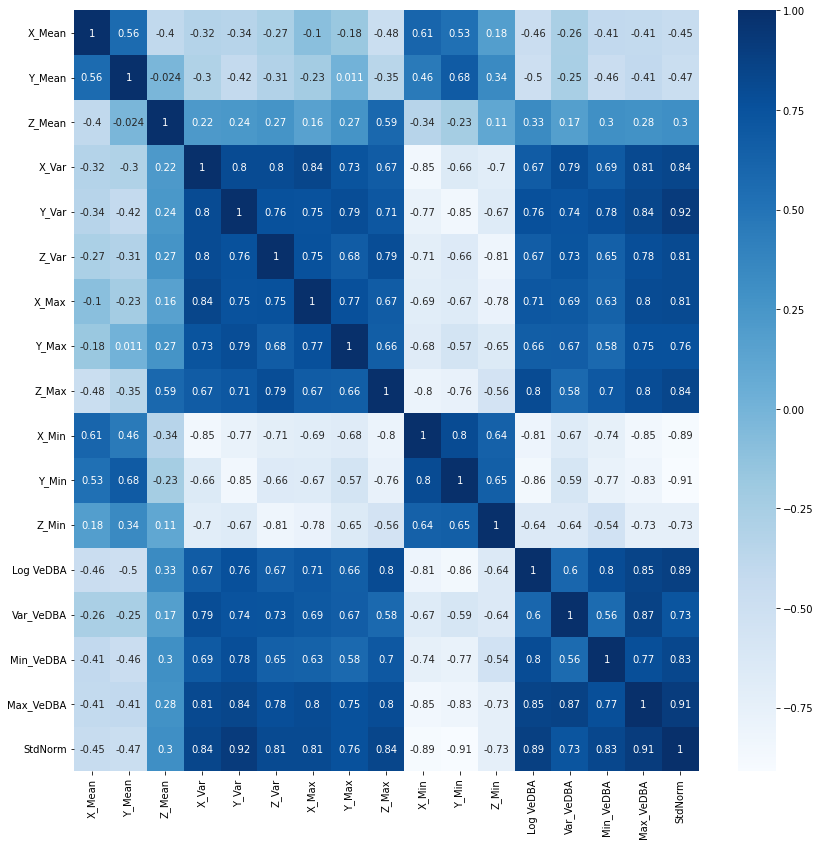

In [74]:

import seaborn as sb
corr = df.drop(['Axy'],axis=1).corr()
plt.figure(figsize=(14,14))
sb.heatmap(corr, cmap="Blues", annot=True)
plt.show()

In [75]:
upper_tri = corr.where(np.triu(np.ones(corr.shape),k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.85)]
to_drop

['Max_VeDBA', 'StdNorm']

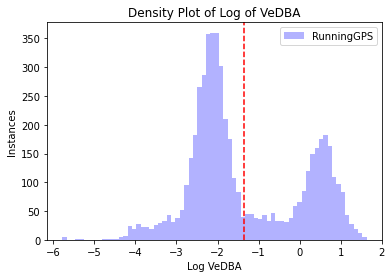

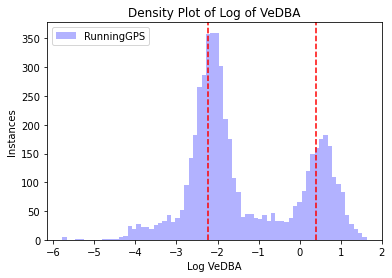

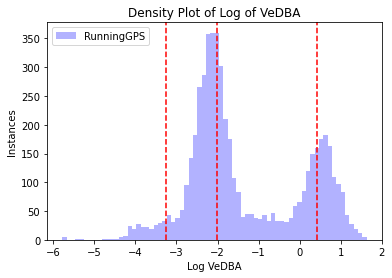

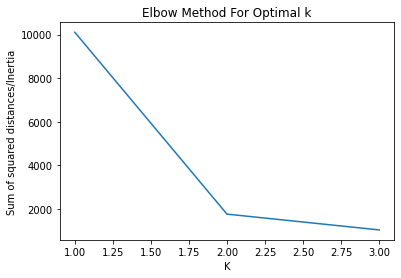

In [5]:
from sklearn.cluster import KMeans


Sum_of_squared_distances = []
K = range(1,4)
for num_clusters in K :
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(df['Log VeDBA'].to_numpy().reshape(-1,1))
    Sum_of_squared_distances.append(kmeans.inertia_)
    plt.hist(df['Log VeDBA'],bins=70,color='b',label='RunningGPS',alpha=0.3)
    plt.title('Density Plot of Log of VeDBA')
    plt.xlabel('Log VeDBA')
    plt.ylabel('Instances')
    plt.legend()
    
    centers = kmeans.cluster_centers_
    for i in centers:
        plt.axvline(x=i, color='r',label = 'Cluster',ls='--')
    plt.show()
plt.plot(K,Sum_of_squared_distances)
plt.xlabel('K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

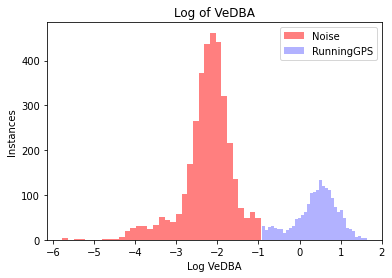

In [7]:
from sklearn.cluster import KMeans

import random

df = pd.read_csv(data_file, index_col=0)
df = df.reset_index(drop=True)

df = df[df.Behavior != 'No observation']
df = df[df.VeDBA > 1e-6]
df.VeDBA  = np.log(df.VeDBA)
df = df.rename(columns={'VeDBA': 'Log VeDBA'})
df.reset_index(drop=True,inplace=True)

X = df['Log VeDBA'].to_numpy().reshape(-1,1)
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y = kmeans.predict(X)
plt.figure()
yhat = kmeans.predict(np.max(kmeans.cluster_centers_).reshape(1,-1))
plt.hist(X[y!=yhat],bins=35,color='r',label='Noise',alpha = .5) 
plt.hist(X[y==yhat],bins=35,color='b',label='RunningGPS',alpha=0.3)

plt.title('Log of VeDBA')
plt.xlabel('Log VeDBA')
plt.ylabel('Instances')
plt.legend()
plt.show()



data_file = '/media/amlan/Data/Thesis Data/Processed Data/run_train_data.csv'
df = pd.read_csv(data_file, index_col=0)
df = df[df.Behavior != 'No observation']
df = df[df.VeDBA > 1e-6]
df.reset_index(drop=True,inplace=True)


indexs= df[y==yhat].index

indexs =np.random.choice(list(indexs), size=len(indexs)//4, replace=False)

Data = pd.read_csv('/media/amlan/Data/Thesis Data/Processed Data/'+'train_data.csv',index_col=0)
Data = pd.concat([Data,df.loc[indexs]],axis=0)

Data.to_csv('/media/amlan/Data/Thesis Data/Processed Data/'+'kmeans_train_data')

For n_clusters = 2 The average silhouette_score is : 0.7553012409317864
For n_clusters = 3 The average silhouette_score is : 0.6523977707762482
For n_clusters = 4 The average silhouette_score is : 0.632684416391781
For n_clusters = 5 The average silhouette_score is : 0.567071849765758


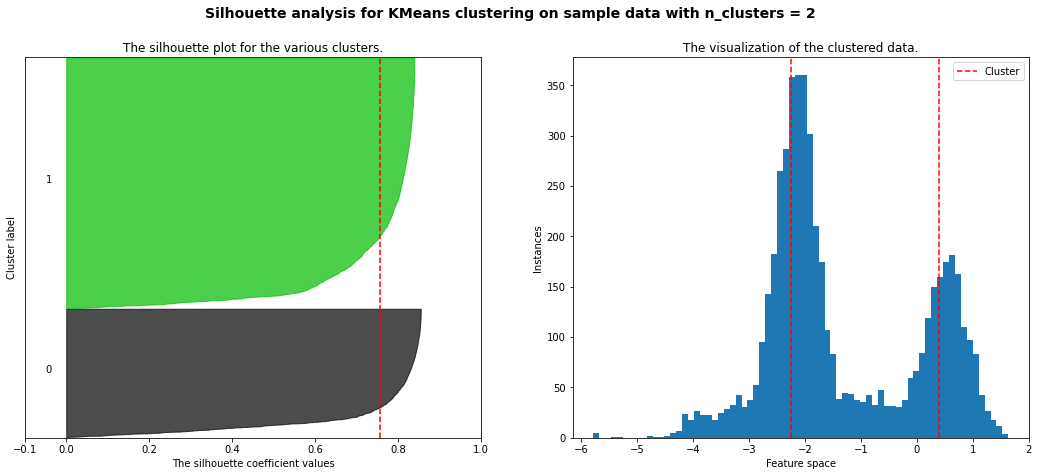

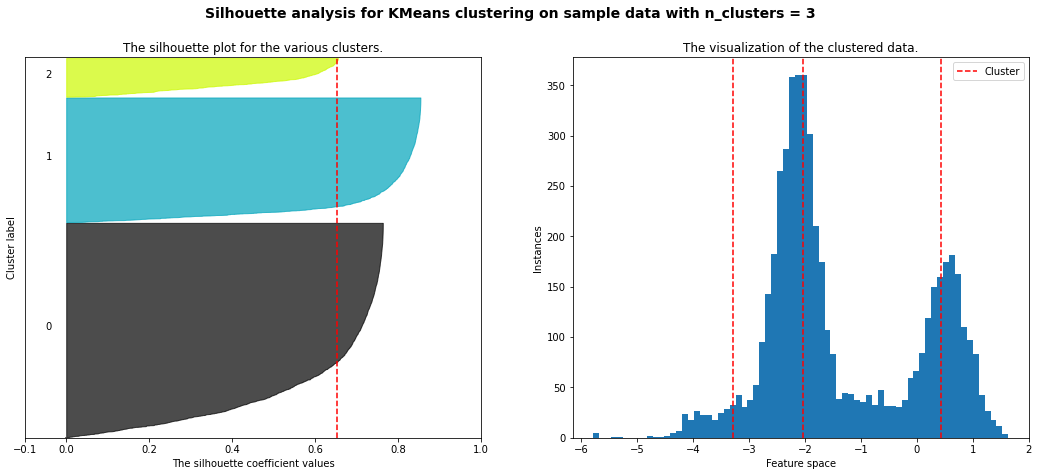

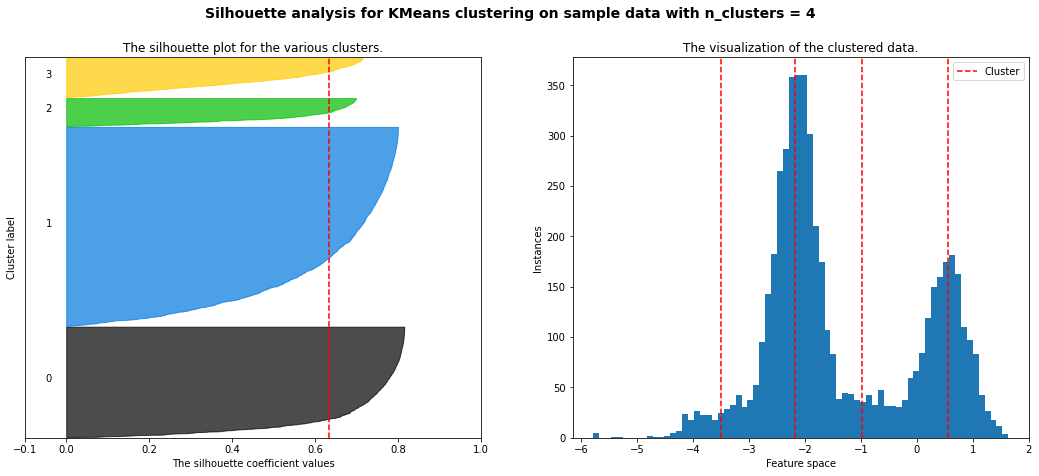

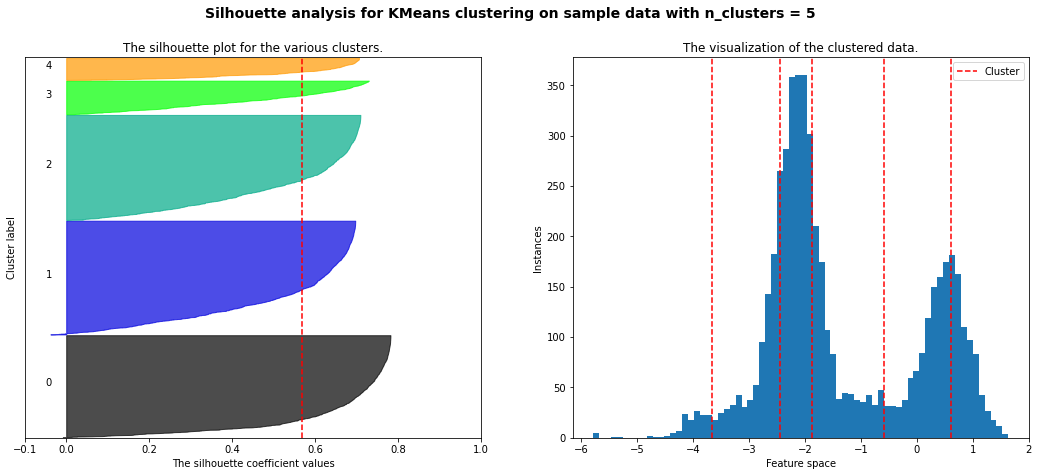

In [79]:
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

data_file = '/media/amlan/Data/Thesis Data/Processed Data/run_train_data.csv'
df = pd.read_csv(data_file, index_col=0)
df = df.reset_index(drop=True)

#df = df[df.Behavior == 'No observation']
df = df[df.VeDBA > 1e-6]
df.VeDBA  = np.log(df.VeDBA)
df = df.rename(columns={'VeDBA': 'Log VeDBA'})

df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df = df.reset_index(drop=True)

X =df['Log VeDBA'].to_numpy().reshape(-1,1)

range_n_clusters = [2, 3, 4, 5]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.hist(X,bins=70)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    

    for i, c in enumerate(centers):
        plt.axvline(x=c, color='r',label = 'Cluster',ls='--')
        
    handles, labels = ax2.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax2.legend(*zip(*unique))
    
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space")
    ax2.set_ylabel("Instances")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()